# Explore here

In [26]:
# Your code here
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
df.to_csv('/workspaces/Regresion-lineal/data/raw/Datos_iniciales_Medical_insurance_cost')

# Obtener las dimensiones
df.shape

(1338, 7)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
# control de duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

duplicadas_incluyendo_primera = df[df.duplicated(keep=False)]
print(duplicadas_incluyendo_primera)

1
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [30]:
# Drop duplicates
df_no_duplicates = df.drop_duplicates()

# If you want to reset the index after dropping duplicates:
df_no_duplicates = df_no_duplicates.reset_index(drop=True)

# Print the shape before and after to see how many duplicates were removed
print("Shape before dropping duplicates:", df.shape)
print("Shape after dropping duplicates:", df_no_duplicates.shape)

Shape before dropping duplicates: (1338, 7)
Shape after dropping duplicates: (1337, 7)


In [31]:
# Visualizar las primeras filas del DataFrame
print(df_no_duplicates.head())
df = df_no_duplicates
df

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [32]:
df_no_duplicates.to_csv('/workspaces/Regresion-lineal/data/processed/Datos_SinDuplicados_Medical_insurance_cost')


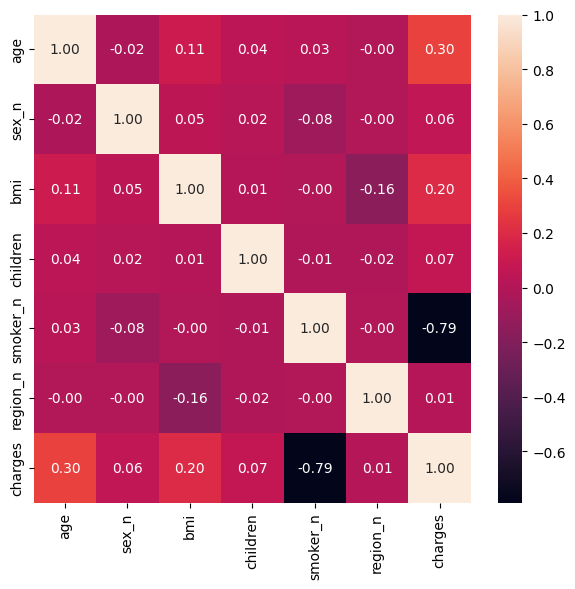

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Factorizar de numero a  
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

fig, axis = plt.subplots(figsize = (6, 6))

sns.heatmap(df[['age', 'sex_n', 'bmi', 'children', 'smoker_n', 'region_n', 'charges']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

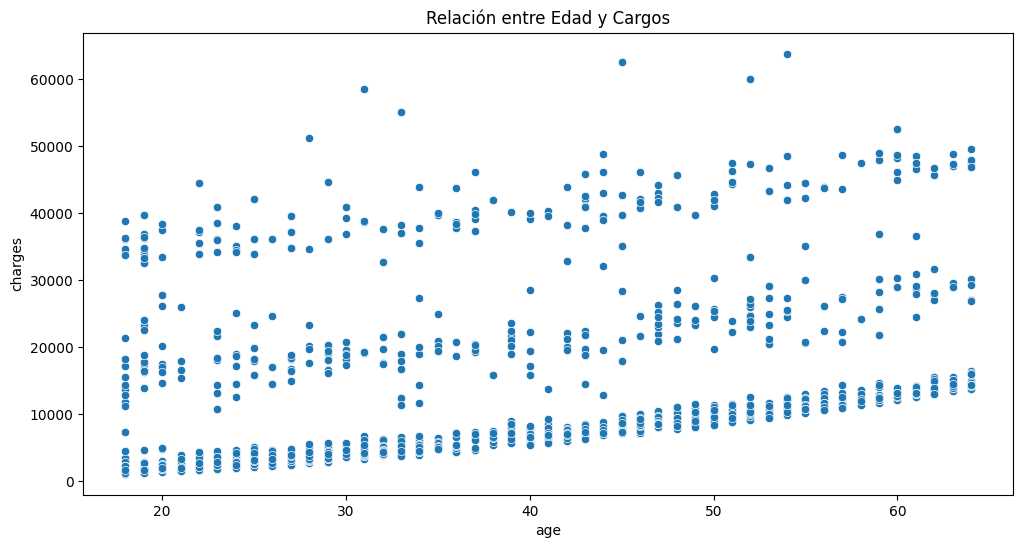

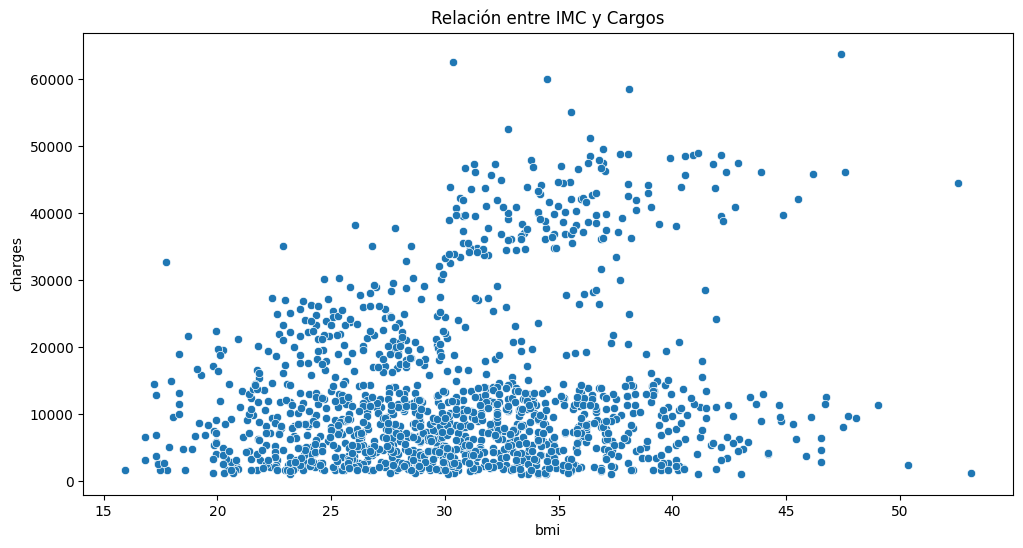

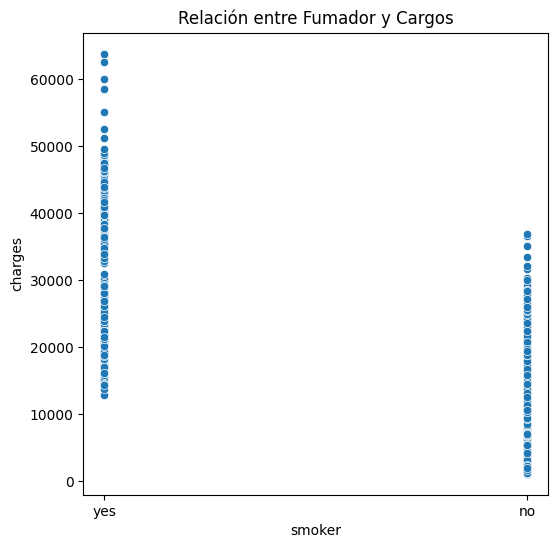

In [34]:
# Del mapa de calor me identifica una interrelacion entre los cargos y la edad, si son fumadores y el indice de masa corporal

# Gráfico de dispersión de Edad vs Cargos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Relación entre Edad y Cargos')
plt.show()

# Gráfico de dispersión de IMC vs Cargos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Relación entre IMC y Cargos')
plt.show()

# Gráfico de dispersión de Fumador vs Cargos
plt.figure(figsize=(6, 6))
sns.scatterplot(x='smoker', y='charges', data=df)
plt.title('Relación entre Fumador y Cargos')
plt.show()






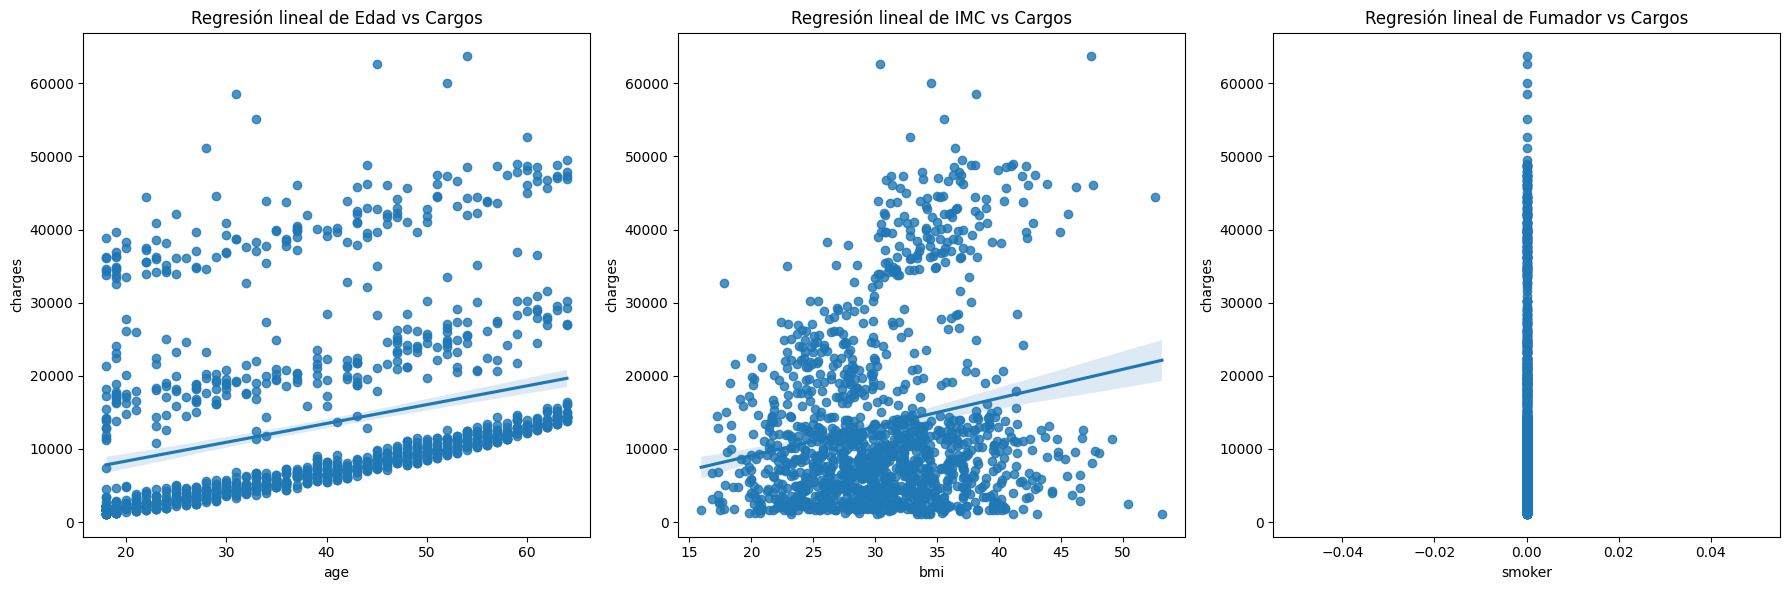

Intercepto Age (b0): 3190.021721031824
Coeficientes Age (b1, b2): [257.22971752]
Intercepto bmi (b0): 1202.1403670662094
Coeficientes bmi  (b1, b2): [393.85589121]
Intercepto smoker (b0): 13279.121486655948
Coeficientes smoker (b1, b2): [0.]


In [40]:
from sklearn.linear_model import LinearRegression


## Inicialización y entrenamiento del modelo


# Regresión lineal de Edad vs Cargos
X_age = df[['age']]
y_age = df['charges']
model_age = LinearRegression()
model_age.fit(X_age, y_age)

# Regresión lineal de IMC vs Cargos
X_bmi = df[['bmi']]
y_bmi = df['charges']
model_bmi = LinearRegression()
model_bmi.fit(X_bmi, y_bmi)

# Regresión lineal de Fumador vs Cargos
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
X_smoker = df[['smoker']]
y_smoker = df['charges']
model_smoker = LinearRegression()
model_smoker.fit(X_smoker, y_smoker)

# Crear los gráficos de regresión lineal
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.regplot(x='age', y='charges', data=df)
plt.title('Regresión lineal de Edad vs Cargos')

plt.subplot(1, 3, 2)
sns.regplot(x='bmi', y='charges', data=df)
plt.title('Regresión lineal de IMC vs Cargos')

plt.subplot(1, 3, 3)
sns.regplot(x='smoker', y='charges', data=df)
plt.title('Regresión lineal de Fumador vs Cargos')

plt.tight_layout()
plt.show()



print(f"Intercepto Age (b0): {model_age.intercept_}")
print(f"Coeficientes Age (b1, b2): {model_age.coef_}")


print(f"Intercepto bmi (b0): {model_bmi.intercept_}")
print(f"Coeficientes bmi  (b1, b2): {model_bmi.coef_}")


print(f"Intercepto smoker (b0): {model_smoker.intercept_}")
print(f"Coeficientes smoker (b1, b2): {model_smoker.coef_}")

In [36]:
# Predicción del modelo
y_pred_bmi = model_bmi.predict(X_bmi)
y_pred_bmi

y_pred_age = model_age.predict(X_age)
y_pred_age

y_pred_smoker = model_smoker.predict(X_smoker)
y_pred_smoker

array([32050.23183153,  8440.66030651,  8440.66030651, ...,
        8440.66030651,  8440.66030651, 32050.23183153])

In [39]:
# Evaluacion del modelo
from sklearn.metrics import r2_score, mean_squared_error


print(f"Error cuadrático medio Age: {mean_squared_error(y_age, y_pred_age)}")
print(f"Coeficiente de determinación Age: {r2_score(y_age, y_pred_age)}")

print(f"Error cuadrático medio bmi: {mean_squared_error(y_bmi, y_pred_bmi)}")
print(f"Coeficiente de determinación bmi: {r2_score(y_bmi, y_pred_bmi)}")

print(f"Error cuadrático medio smoker: {mean_squared_error(y_smoker, y_pred_smoker)}")
print(f"Coeficiente de determinación smoker: {r2_score(y_smoker, y_pred_smoker)}")

Error cuadrático medio Age: 133509857.07843919
Coeficiente de determinación Age: 0.08898778965078391
Error cuadrático medio bmi: 140782441.5807873
Coeficiente de determinación bmi: 0.03936288983126668
Error cuadrático medio smoker: 55727828.34417347
Coeficiente de determinación smoker: 0.619737949026792


In [ ]:
# Me parece que el metodo de regresion lineal no se adapta a los datos suministrados, 
# pues hay una dispersion importante en los datos con respecto a los cargos de seguro
